# Are Relations Relevant in CNNs? *A Study Based on a Facial Dataset*

## Testing CNN with Features Closer Together *(30 Epochs - 13 Layers)*

### Imports, Seed, GPU integration

In [1]:
import numpy as np
import random
import tensorflow as tf

In [2]:
# Seeds for better reproducibility
seed = 42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

In [3]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [4]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


### Data preparation

In [5]:
test_path = '../../../picasso_dataset/FCT-data/shifted/test'

In [6]:
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['no_face', 'face'], batch_size=10, shuffle=False)

Found 3000 images belonging to 2 classes.


In [7]:
assert test_batches.n == 3000
assert test_batches.num_classes == 2

### Loading the trained CNN

In [8]:
filename='../models/CNN-FCT-30E-13L-03.h5'
loaded_model = load_model(filename)

### Accuracy and loss of the trained model

In [9]:
scores = loaded_model.evaluate(test_batches, verbose=2)
print("Accuracy: %.2f%%" % (scores[1]*100))
print("Loss: %.2f%%" % (scores[0]*100))

300/300 - 7s - loss: 0.9893 - accuracy: 0.8043
Accuracy: 80.43%
Loss: 98.93%


### Testing the CNN

In [10]:
predictions = loaded_model.predict(x=test_batches, steps=len(test_batches), verbose=0)

### Index of wrongly predicted pictures

In [11]:
y_true=test_batches.classes
y_pred=np.argmax(predictions, axis=-1)
cm = confusion_matrix(y_true = y_true, y_pred = y_pred)

In [12]:
face_but_predicted_no_face=[]
no_face_but_predicted_face=[]

for i in range(len(predictions)):
        if y_true[i] != y_pred[i]:
            if y_true[i] == 1:
                face_but_predicted_no_face.append(i+8001-1500) #Index of file on disk
            else:
                no_face_but_predicted_face.append(i+8001) #Index of file on disk

print("Data from class 'face', that was wrongly predicted as 'no-face' [", len(face_but_predicted_no_face), "] :")
print(face_but_predicted_no_face)
print("----------------------------------------------------------------------------------------------")
print("Data from class 'no-face', that was wrongly predicted as 'face' [", len(no_face_but_predicted_face), "] :")
print(no_face_but_predicted_face)

Data from class 'face', that was wrongly predicted as 'no-face' [ 474 ] :
[8001, 8005, 8010, 8012, 8017, 8019, 8020, 8022, 8023, 8026, 8028, 8032, 8034, 8035, 8036, 8039, 8040, 8047, 8049, 8054, 8059, 8061, 8065, 8068, 8075, 8082, 8090, 8093, 8095, 8108, 8113, 8121, 8122, 8130, 8133, 8135, 8136, 8137, 8141, 8142, 8156, 8160, 8169, 8172, 8174, 8179, 8184, 8186, 8187, 8188, 8193, 8194, 8195, 8197, 8200, 8202, 8207, 8217, 8219, 8224, 8225, 8231, 8234, 8237, 8239, 8249, 8250, 8251, 8254, 8256, 8257, 8262, 8266, 8267, 8269, 8280, 8293, 8298, 8299, 8302, 8304, 8305, 8308, 8312, 8319, 8325, 8326, 8327, 8331, 8336, 8343, 8345, 8348, 8349, 8354, 8356, 8359, 8362, 8366, 8368, 8369, 8370, 8371, 8372, 8375, 8376, 8378, 8380, 8382, 8384, 8385, 8391, 8396, 8397, 8399, 8402, 8404, 8406, 8408, 8411, 8412, 8420, 8426, 8428, 8431, 8435, 8436, 8439, 8440, 8442, 8449, 8450, 8453, 8457, 8461, 8462, 8465, 8468, 8471, 8473, 8475, 8476, 8478, 8479, 8483, 8484, 8486, 8489, 8500, 9002, 9006, 9007, 9008, 9009, 9

### Confusion matrix

In [13]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [14]:
test_batches.class_indices

{'no_face': 0, 'face': 1}

Confusion matrix, without normalization
[[1387  113]
 [ 474 1026]]


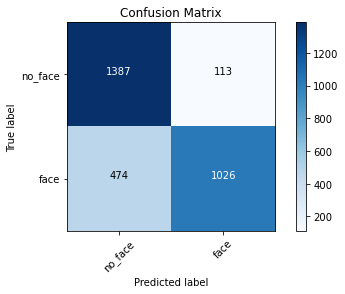

In [15]:
cm_plot_labels = ['no_face','face']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')